# Association Rule Mining to find patterns in prescription data
#### The most common and clinically significant prescription combinations among patients based on historical prescription data
#### This research aims to find the most common and important associations or combinations of prescription drugs in historical patient records. The analysis aims to reveal patterns in how medicines are used together, and which drugs are often prescribed together.

In [1]:
from platform import python_version
print("\n Python version for Market Basket Analysis is ",python_version())


 Python version for Market Basket Analysis is  3.11.7


import pandas as pd
import numpy as np
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore') 
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   


## Load the dataset with prescription records


In [3]:
prescdata=pd.read_csv('C:/Users/laksh/Desktop/WGU-MS Data analytics/MSDA-D212-Data Mining II/Task3-MarketBasketAnalysis\Marketbasket data\medical_market_basket.csv')
prescdata.head(20)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The drug names have inconsistencies in format ('metoprolol succinate XL' and 'metoprolol succinate xl'). We need to standardize the names to ensure that the same drug is recognized correctly during the analysis.

In [4]:
# convert to lowercase to get rid of inconsistencies
prescdata = prescdata.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# 'metoprolol succinate XL' converts to 'metoprolol succinate xl'

In [5]:
prescdata.head(20)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate xl,sulfamethoxazole,abilify,spironolactone,albuterol hfa,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
prescdata.shape

(15002, 20)

### Many rows have NaN (Not a Number) values in the entire row, and this needs to be addressed. We will remove the rows which have all NaN values.

In [7]:
#Drop rows with null values (Eg:Presc01 has rows with NaN in entire row)
prescdata=prescdata[prescdata['Presc01'].notna()]
print(prescdata.shape)


(7501, 20)


In [8]:
prescdata.head(10)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate xl,sulfamethoxazole,abilify,spironolactone,albuterol hfa,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,cialis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,hydrochlorothiazide,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,metformin,salmeterol inhaler,sertraline hci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,metoprolol,carvedilol,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#!pip install mlxtend

### Convert the prescription data into a format suitable for market basket analysis using the TransactionEncoder from the mlxtend library. This transformation will allow the algorithm to analyze the co-occurrence of drugs effectively.

#### The resulting transaction DataFrame contains True or False values, indicating whether each drug was prescribed in a given transaction. 

In [10]:
#convert the prescription data into a format suitable for market basket analysis 

# Convert DataFrame to list of lists
rows = []  # Initialize empty list

# For each row and column in the DataFrame, convert values to string format
for i in range(0, 7501):    
    rows.append([str(prescdata.values[i, j]) for j in range(0, 20)])

#list fed to TransactionEncoder
encod=TransactionEncoder()
encoded_array=encod.fit(rows).transform(rows)

#return array to dataframe
transaction=pd.DataFrame(encoded_array,columns=encod.columns_)
transaction

,abilify,acetaminophen,actonel,albuterol aerosol,albuterol hfa,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,...,triamcinolone ace topical,triamterene,trimethoprim ds,valaciclovir,valsartan,venlafaxine xr,verapamil sr,viagra,yaz,zolpidem
0,True,False,False,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#Inspect the column values
for col in transaction.columns:
    print(col)

abilify
acetaminophen
actonel
albuterol aerosol
albuterol hfa
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate k+
clonazepam
clonidine hci
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine xr
diazepam
diclofenac sodium
doxycycline hyclate
duloxetine
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine hci
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
metformin
metfor

### Remove the NaN values from the dataset

In [12]:
#Remove NaN from dataset
clean_prescdata=transaction.drop(['nan'],axis=1)
clean_prescdata.head(7505)


,abilify,acetaminophen,actonel,albuterol aerosol,albuterol hfa,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,...,triamcinolone ace topical,triamterene,trimethoprim ds,valaciclovir,valsartan,venlafaxine xr,verapamil sr,viagra,yaz,zolpidem
0,True,False,False,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Final dataset for market basket analysis
clean_prescdata.head(20)

,abilify,acetaminophen,actonel,albuterol aerosol,albuterol hfa,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,...,triamcinolone ace topical,triamterene,trimethoprim ds,valaciclovir,valsartan,venlafaxine xr,verapamil sr,viagra,yaz,zolpidem
0,True,False,False,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### A transaction is a list of unique items that were purchased together. In this analysis, a transaction represents a single patient’s prescription record, showing which specific drugs were prescribed together at one time. 

#### Transaction examples
##### Transaction ID 0:{abilify, albuterol HFA, albuterol aerosol, allopurinol} 
#####  Transaction ID 18:{Duloxetine, abilify} 

In [14]:
clean_prescdata.to_csv('C:/Users/laksh/Desktop/WGU-MS Data analytics/MSDA-D212-Data Mining II/Task3-MarketBasketAnalysis\Marketbasket data\/clean_prescriptiondata.csv',index=False)
clean_prescdata.columns

Index(['abilify', 'acetaminophen', 'actonel', 'albuterol aerosol',
       'albuterol hfa', 'alendronate', 'allopurinol', 'alprazolam',
       'amitriptyline', 'amlodipine',
       ...
       'triamcinolone ace topical', 'triamterene', 'trimethoprim ds',
       'valaciclovir', 'valsartan', 'venlafaxine xr', 'verapamil sr', 'viagra',
       'yaz', 'zolpidem'],
      dtype='object', length=119)

## Market Basket Analysis with Apriori algorithm

##### Use apyori for smaller datasets, requires fewer dependencies and is easy to set up if our only need is Apriori
##### Use mlxtend.frequent_patterns for larger datasets or when we need more control over itemsets and metrics like confidence, lift, and leverage in association rules.


### Import Appropriate Libraries

### Load the Transformed dataset


In [16]:
mining_data=pd.read_csv('C:/Users/laksh/Desktop/WGU-MS Data analytics/MSDA-D212-Data Mining II/Task3-MarketBasketAnalysis/Marketbasket data/clean_prescriptiondata.csv')
mining_data.head()

,abilify,acetaminophen,actonel,albuterol aerosol,albuterol hfa,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,...,triamcinolone ace topical,triamterene,trimethoprim ds,valaciclovir,valsartan,venlafaxine xr,verapamil sr,viagra,yaz,zolpidem
0,True,False,False,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### finding the most popular items
##### Identifies products that have the highest frequency of prescription. It doesn't consider relationships between drugs.


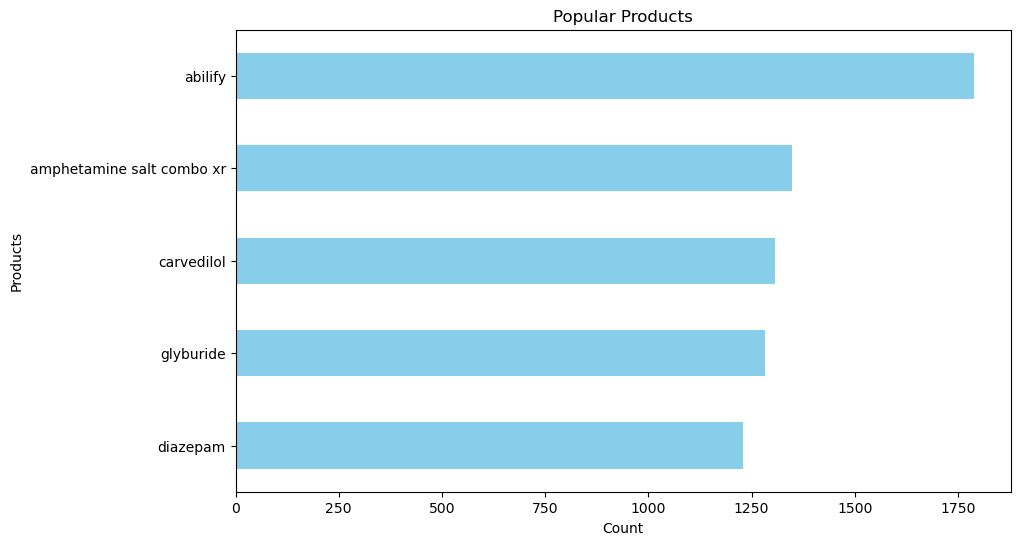

In [17]:
#selects the top 5 most popular products based on their count

# Calculate count of each item
count = mining_data.sum()  
popular_item = count.sort_values(ascending=False).head(5)  #sorts the items based on their counts in descending order

# Convert Series to DataFrame
popular_item = popular_item.to_frame().reset_index()    #converts the popular_item into a DataFrame
popular_item = popular_item.rename(columns={'index': 'products', 0: 'count'})    #turning the index  into a column.

# Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
ax = popular_item.plot.barh(x='products', y='count', legend=False, color='skyblue')
plt.title('Popular Products')
plt.xlabel('Count')
plt.ylabel('Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the most popular items at the top
plt.show()
#plt.savefig("C:/Users/laksh/Desktop/WGU-MS Data analytics/MSDA-D212-Data Mining II/Task3-MarketBasketAnalysis/Top5popularitems.png")

### Creating Apriori object called rules

##### Apriori algorithm helps us reduce the complexity of large datasets by eliminating low-support itemsets nand identifies the frequent individual items .
##### The Apriori principle states that subsets of frequent sets must also be frequent. The Apriori algorithm uses this principle to retain frequent sets and prune those that cannot be said to be frequent. 

In [18]:
rules=apriori(mining_data,min_support=0.02,use_colnames=True)   #only itemsets appearing in at least 2% of the transactions will be considered frequent
print(len(rules))

#Apriori algorithm generates a list of frequent itemsets, but it does not provide any rules on the direction of association (like which item leads to another).

103


In [19]:
rules.head(5)

,support,itemsets
0,0.238368,(abilify)
1,0.020397,(albuterol aerosol)
2,0.033329,(allopurinol)
3,0.079323,(alprazolam)
4,0.071457,(amlodipine)


In [20]:

print(mlxtend.__version__)

0.23.2


## Generate Association Rules 
#### The association_rules() function is applied after the apriori() to generate the association rules. It uses the frequent itemsets generated by apriori() to create association rules. These rules show relationships between items in terms of antecedents and consequents.

#### Here we use confidence as a metric, the minimum threshold for confidence is set to 0.3, meaning only rules where the confidence is at least 30% will be included. A higher confidence threshold will result in fewer but stronger rules, whereas a lower threshold will generate more rules, but with lower confidence. We can adjust this threshold to get more or fewer rules. The lift, which refers to the interestingness measure could also be used as a metric to generate rules with minimum thresholds. 

In [21]:
#association_rules()  uses the frequent itemsets generated by apriori() to create association rules.
# It evaluates each rule using metrics like support, confidence, and lift

# number of itemsets 
num_itemsets = len(rules)


# Generate the association rules
rule_table = association_rules(rules, metric="confidence", min_threshold=0.3,num_itemsets=num_itemsets)

# min_threshold=1 and metric="lift" creates 94 rules , this can be adjusted according to the criteria
#higher confidence threshold will result in fewer but stronger rules


# Display the first 20 rules
rule_table.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
1,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
4,(cialis),(abilify),0.076523,0.238368,0.023997,0.313589,1.315565,1.0,0.005756,1.109585,0.259747,0.082493,0.098762,0.207130
5,(clopidogrel),(abilify),0.059992,0.238368,0.022797,0.380000,1.594172,1.0,0.008497,1.228438,0.396502,0.082729,0.185958,0.237819
6,(dextroamphetamine xr),(abilify),0.081056,0.238368,0.027463,0.338816,1.421397,1.0,0.008142,1.151921,0.322617,0.094064,0.131885,0.227014
7,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,1.0,0.011071,1.180529,0.362712,0.112544,0.152922,0.248169
9,(fenofibrate),(abilify),0.051060,0.238368,0.020131,0.394256,1.653978,1.0,0.007960,1.257349,0.416672,0.074752,0.204676,0.239354


##### antecedents:   The initial item or items in the rule 
#####  consequents:   The item or items likely to follow the antecedent
##### support:       The overall frequency of both antecedent and consequent appearing together in the dataset.
##### confidence:    The probability of the consequent appearing given the antecedent, measure of how often a rule is true in the data
##### lift:          Measures the strength of the association, is a measure of how much more likely the consequent of a rule is to occur when the antecedent is present, compared to when it is absent.


#### Note:  The reason for the prescription is not included in the prescription data; arguments for the association_rules() can be adjusted based on business requirements.
####  Different metrics and thresholds filters the rules according to different criteria


In [22]:
print(len(rule_table))

20


## Top 3 Rules by support
##### High-support rules show commonly occurring associations, indicating popular item combinations.
##### Support is the probability of an item or itemset occurring in the dataset

In [23]:
top_three_rules_support=rule_table.sort_values('support',ascending=False).head(3)
top_three_rules_support



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
7,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856


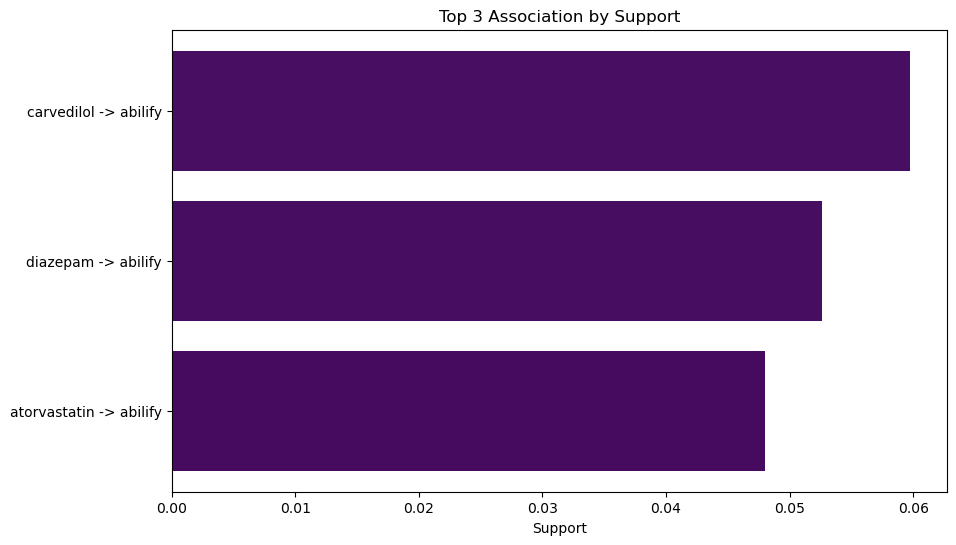

In [24]:
import matplotlib.cm as cm
# Plot lift values for top rules
plt.figure(figsize=(10, 6))
colors = cm.viridis(top_three_rules_support['support'] / top_three_rules_support['lift'].max())
plt.barh(
    top_three_rules_support['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' +
    top_three_rules_support['consequents'].apply(lambda x: ', '.join(list(x))),
    top_three_rules_support['support'],  color=colors
)

plt.xlabel('Support')
plt.title('Top 3 Association by Support')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

## Top 3 Rules by confidence
##### High confidence values indicate that the antecedent is a strong predictor of the consequent
##### Confidence measures the likelihood of item B being present in a transaction when item A is already present

In [25]:
top_three_rules_confidence=rule_table.sort_values('confidence',ascending=False).head(3)
top_three_rules_confidence



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
13,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
10,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
12,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127


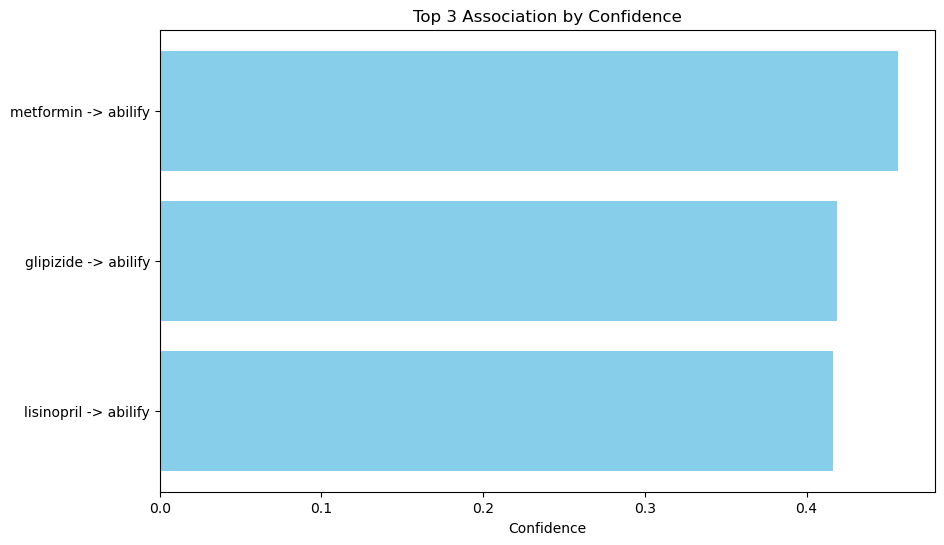

In [26]:
# Plot lift values for top rules
plt.figure(figsize=(10, 6))
#colors = cm.viridis(top_three_rules_confidence['confidence'] /top_three_rules_confidence['lift'].max())
plt.barh(
    top_three_rules_confidence['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' +
    top_three_rules_confidence['consequents'].apply(lambda x: ', '.join(list(x))),
    top_three_rules_confidence['confidence'],  color='skyblue'
)

plt.xlabel('Confidence')
plt.title('Top 3 Association by Confidence')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

## Top 3 Rules by lift
 ##### High-lift rules show a strong positive association,  where the presence of one drug increases the likelihood of the other
##### Lift compares the probability of items A and B appearing together with what would be expected if they were independent

In [27]:
top_three_rules_lift=rule_table.sort_values('lift',ascending=False).head(3)
top_three_rules_lift



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
19,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
18,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
13,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610


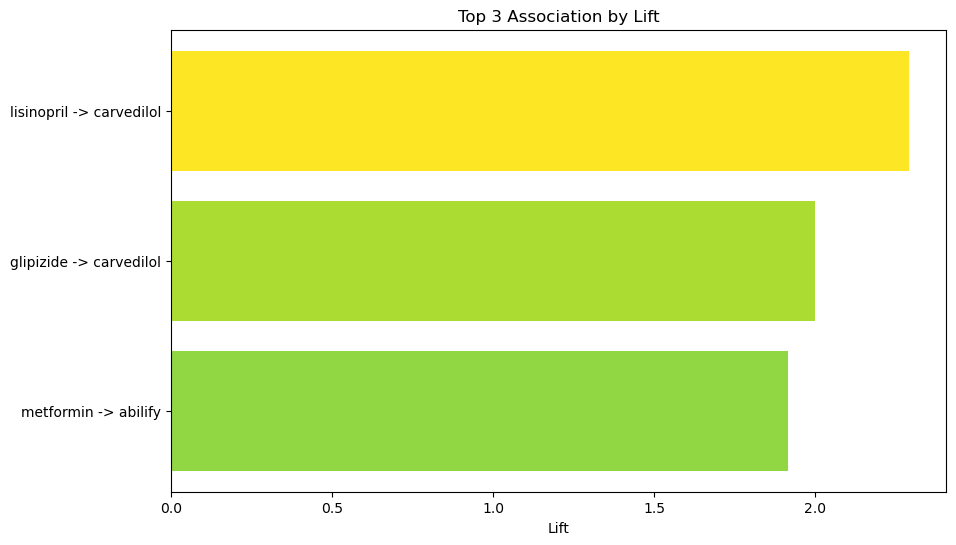

In [28]:

# Plot lift values for top rules
plt.figure(figsize=(10, 6))
colors = cm.viridis(top_three_rules_lift['lift'] / top_three_rules_lift['lift'].max())
plt.barh(
    top_three_rules_lift['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' +
    top_three_rules_lift['consequents'].apply(lambda x: ', '.join(list(x))),
    top_three_rules_lift['lift'], color=colors
)
#plt.barh(top_five_rules['antecedents'].astype(str) + ' -> ' + top_five_rules['consequents'].astype(str), 
        # top_five_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 3 Association by Lift')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

#### A lift of 2.291162	 indicates that the occurrence of Lisinopril with Carvedilol is about 2.3 times more likely than if they were independent

## Parallel coordinate plot for Association 

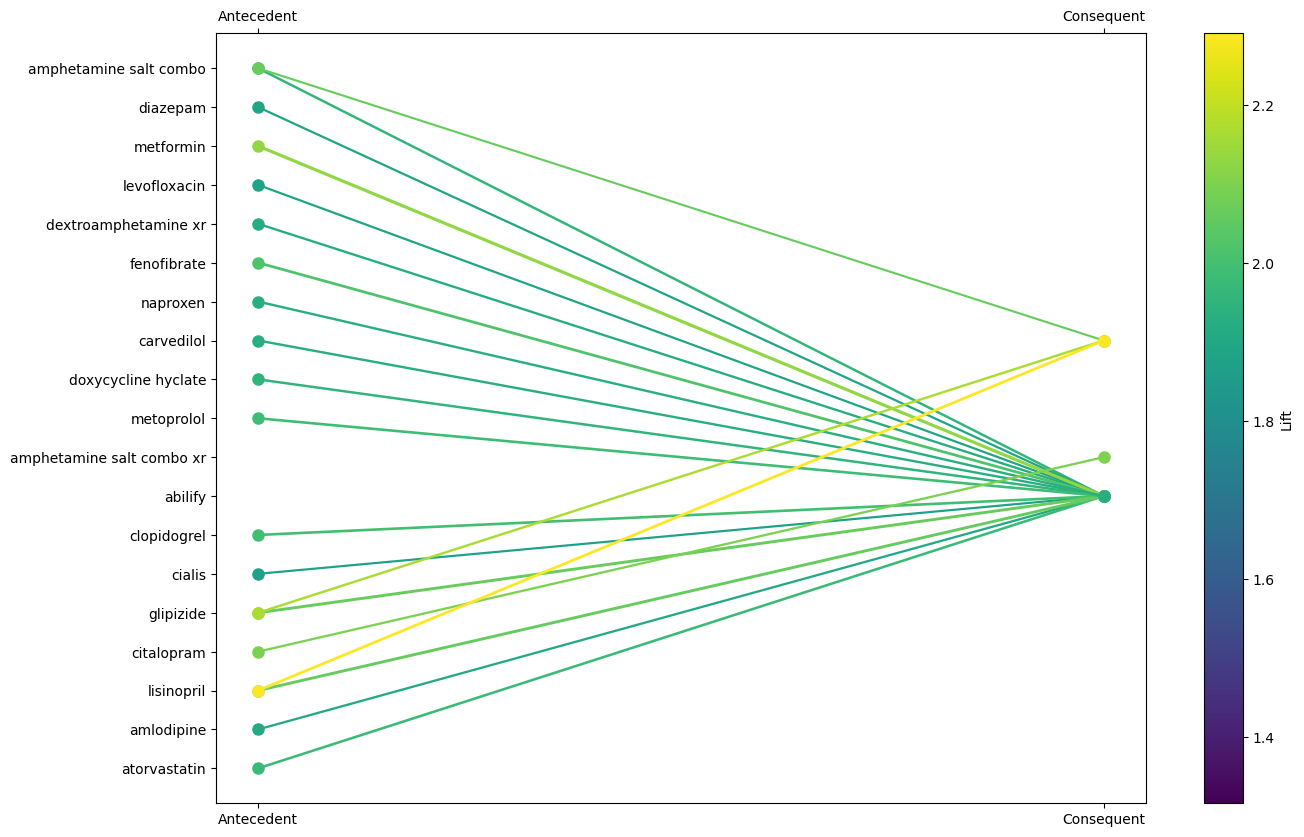

In [29]:

# Convert antecedents and consequents from frozensets to strings for readability
rule_table['antecedents_str'] = rule_table['antecedents'].apply(lambda x: ', '.join(list(x)))
rule_table['consequents_str'] = rule_table['consequents'].apply(lambda x: ', '.join(list(x)))

# List all unique items from both 'antecedents_str' and 'consequents_str'
items = set(rule_table['antecedents_str']).union(set(rule_table['consequents_str']))

# Create a mapping of items to numbers
imap = {item: i for i, item in enumerate(items)}

# Map the items to numbers and add numeric columns for antecedents and consequents
rule_table['antecedent_num'] = rule_table['antecedents_str'].map(imap)
rule_table['consequent_num'] = rule_table['consequents_str'].map(imap)

# Prepare the plot
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
fig, ax = plt.subplots(figsize=(15, 10))

# Draw a line between items for each rule, coloring by 'lift' and width by 'confidence'
for index, row in rule_table.head(20).iterrows():
    plt.plot([0, 1], [row['antecedent_num'], row['consequent_num']], 'o-', 
             color=cm.viridis(row['lift'] / rule_table['lift'].max()), 
             markersize=8, lw=row['confidence'] * 5)

# Add a colorbar for lift and set its label
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=rule_table['lift'].min(), vmax=rule_table['lift'].max()))
cb = plt.colorbar(sm, ax=ax)
cb.set_label('Lift')

# Map item names to numeric positions for y-axis labels
plt.yticks(range(len(items)), [item for item in imap.keys()], rotation='horizontal')
plt.xticks([0, 1], ['Antecedent', 'Consequent'])

plt.show()

#parallel coordinate plot visualizes the association rules between drugs by drawing lines between antecedents and consequents.
#The intensity of the color represents the lift, with darker lines indicating stronger associations, and the width represents confidence. 

## Visualization shows the association rules between drugs by drawing lines between antecedents and consequents. The intensity of the color represents the lift, with darker lines indicating stronger associations, and the width represents confidence. 

In [30]:
#filter the association rules 

sorted_rules = rule_table[rule_table['lift'] > 1.5].sort_values(by='lift', ascending=False)
print("count of top significant associations by lift greater than 1.5  are:",len(sorted_rules))
#sorted_rules.head(5)

count of top significant associations by lift greater than 1.5  are: 11


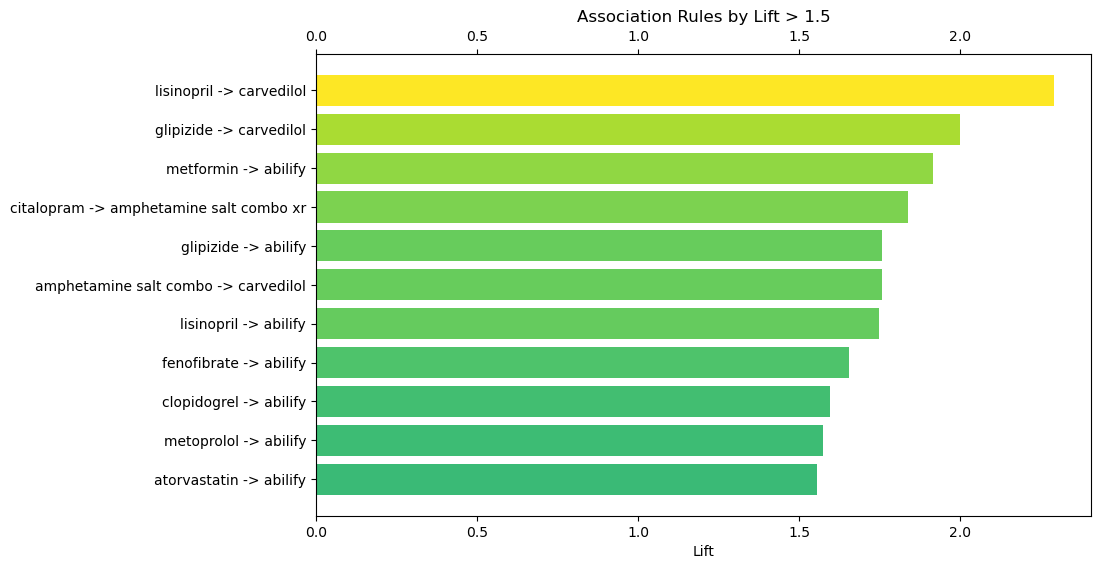

In [31]:
# Plot lift values for top rules
plt.figure(figsize=(10, 6))
colors = cm.viridis(sorted_rules['lift'] / sorted_rules['lift'].max())
plt.barh(
    sorted_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' +
    sorted_rules['consequents'].apply(lambda x: ', '.join(list(x))),
    sorted_rules['lift'], color=colors
)
#plt.barh(top_five_rules['antecedents'].astype(str) + ' -> ' + top_five_rules['consequents'].astype(str), 
        # top_five_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Association Rules by Lift > 1.5')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

### Count of frequent combinations

In [32]:
from collections import Counter

# Convert antecedents and consequents into lists of items
antecedents = rule_table['antecedents'].apply(lambda x: list(x))
consequents = rule_table['consequents'].apply(lambda x: list(x))

# Combine the two Series using pd.concat, then explode into individual items
all_items = pd.concat([antecedents, consequents]).explode()

# Count occurrences of each drug across both antecedents and consequents
drug_counts = Counter(all_items)

# Display the top 20 most common drugs
drug_counts.most_common(20)

[('abilify', 16),
 ('carvedilol', 4),
 ('amphetamine salt combo', 2),
 ('glipizide', 2),
 ('lisinopril', 2),
 ('amlodipine', 1),
 ('atorvastatin', 1),
 ('cialis', 1),
 ('clopidogrel', 1),
 ('dextroamphetamine xr', 1),
 ('diazepam', 1),
 ('doxycycline hyclate', 1),
 ('fenofibrate', 1),
 ('levofloxacin', 1),
 ('metformin', 1),
 ('metoprolol', 1),
 ('naproxen', 1),
 ('citalopram', 1),
 ('amphetamine salt combo xr', 1)]

#### Based on the result, 'abilify' appears the most frequently, with a count of 16
#### Drugs with higher counts are frequently linked with other prescriptions. This can reveal typical prescription patterns or popular combinations in treatment.


#### Since the reason for the prescription is not included in the dataset, we can't link drug combinations to specific health conditions. However, the analysis can still show which drugs are often prescribed together. This helps healthcare professionals understand common treatment patterns, even without knowing the exact medical reasons. 